In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the raw dataset
data_path = "../data/raw/BDT2.csv"
data = pd.read_csv(data_path)

In [3]:
#Display the dataframe to understand its structure
data.head()

,No,IdYearCountry,IfDuplicates,Year,Ranking,Country,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual
0,1,2015Switzerland,0,2015,1,Switzerland,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2,2015Iceland,0,2015,2,Iceland,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,3,2015Denmark,0,2015,3,Denmark,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,4,2015Norway,0,2015,4,Norway,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,5,2015Canada,0,2015,5,Canada,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


In [4]:
#Anonymise the data - remove country, rank and year information 
data_cleaned = data.drop(['No','IdYearCountry', 'IfDuplicates', 'Year', 'Ranking', 'Country'], axis =1)

#Verfiy the changes 
data_cleaned

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452
...,...,...,...,...,...,...,...,...
1362,3.207,0.531,0.652,0.105,0.664,0.834,0.183,1.162
1363,3.204,0.758,0.690,0.069,0.654,0.766,0.112,0.905
1364,3.138,0.670,0.555,0.092,0.660,0.858,0.193,1.221
1365,2.392,1.417,0.530,0.398,0.474,0.891,0.061,-0.110


In [5]:
#Summary statistics on the dataset
data_cleaned.describe()

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual
count,1367.000000,1367.00000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.441088,1.01942,0.973050,0.583619,0.507486,0.322236,0.196263,2.013079
std,1.117911,0.45371,0.301304,0.245533,0.206631,0.310599,0.113314,0.572775
min,1.859000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.599500,0.69650,0.790000,0.402000,0.375000,0.074500,0.115000,1.667500
50%,5.440000,1.04300,0.929000,0.612000,0.500000,0.155000,0.183000,2.025000
75%,6.256500,1.33850,1.203500,0.778000,0.633000,0.657500,0.253000,2.393500
max,7.842000,2.20900,1.644000,1.141000,0.970000,0.939000,0.838000,3.838000


## Explanation of Features - World Happiness Report
The World Happiness Report uses several key measures to evaluate and compare levels of happiness across countries. These measures are designed to capture different dimensions of happiness and well-being, making the case that happiness is a multifaceted phenomenon influenced by various factors. 

### GDP per Capita (GDPperCapita)
**Scale/Units**: The logarithm of GDP per capita is used to measure the economic prosperity of a country. It's expressed in international dollars, adjusted for purchasing power parity (PPP).

**Application to Individuals**: Reflects the average economic wealth and financial resources available to individuals in a country. Higher GDP per capita can mean better access to quality goods and services, healthcare, education, and leisure activities, contributing to overall well-being and happiness.

### Social Support (Family)
**Scale/Units**: Measured on a scale from 0 to 1, where higher values indicate better perceived social support.

**Application to Individuals**: Represents the presence and quality of social relationships, including family, friends, and community. Strong social support networks are crucial for emotional well-being, offering a sense of belonging, increased life satisfaction, and support during difficult times.

### Healthy Life Expectancy (LifeExpectancy)
**Scale/Units**: Expressed in years, it estimates the average number of years a person is expected to live in good health. Even though the life expectancy is represented as a fraction, it indirectly reflects the health conditions, medical services quality, and overall well-being of individuals in a country. A higher normalized value suggests a better health status and longer life expectancy, which contributes positively to an individual's happiness and well-being.

**Application to Individuals**: Reflects the physical health aspect of happiness. Longer healthy life expectancy suggests that individuals have better access to healthcare, nutrition, and live in environments that support physical well-being, all of which are essential for maintaining a high quality of life.

### Freedom to Make Life Choices (Freedom)
**Scale/Units**: Measured on a scale from 0 to 1, where higher values denote greater freedom.

**Application to Individuals**: Indicates the degree to which individuals feel free to make their own life choices, such as pursuing their desired career, expressing themselves freely, and participating in political and societal decisions. Personal autonomy is linked to higher happiness and life satisfaction.

### Perceptions of Corruption (NoCorruption)
**Scale/Units**: Also measured on a scale from 0 to 1, where lower values indicate higher perceived levels of corruption.

**Application to Individuals**: Assesses the extent to which corruption is viewed as widespread within a country. High levels of perceived corruption can undermine trust in institutions and society, impacting individuals' sense of fairness, security, and happiness.

### Generosity (Generosity)
**Scale/Units**: Measured on a scale from 0 to 1, assessing the average propensity to help others.

**Application to Individuals**: Reflects the willingness of people in a country to engage in acts of generosity, such as donating to charity or helping a stranger. For individuals, participating in generous acts can enhance feelings of social connection, improve well-being, and contribute to a sense of purpose and happiness.

### Dystopia Residual (DystopiaResidual)
**Scale/Units**: A theoretical benchmark determined by the lowest national averages for each key variable and serves as a reference point. It’s a composite score, not directly measured but inferred from the other variables.

**Application to Individuals**: Represents the aspects of happiness not explained by the measured factors, acting as a catch-all for any unobserved components. For individuals, this could include personal circumstances or psychological factors influencing happiness beyond the societal or economic conditions measured by the other variables.

These measures collectively offer a comprehensive view of what contributes to happiness on a national level, and they can similarly be applied to assess individual well-being. Each factor plays a role in shaping an individual's overall happiness and life satisfaction, emphasizing the multifaceted nature of well-being.

In [6]:
# Summary statistics for the Happiness Score - to feature engineer a binary classification of happiness 
data_cleaned['Score'].describe()

count    1367.000000
mean        5.441088
std         1.117911
min         1.859000
25%         4.599500
50%         5.440000
75%         6.256500
max         7.842000
Name: Score, dtype: float64

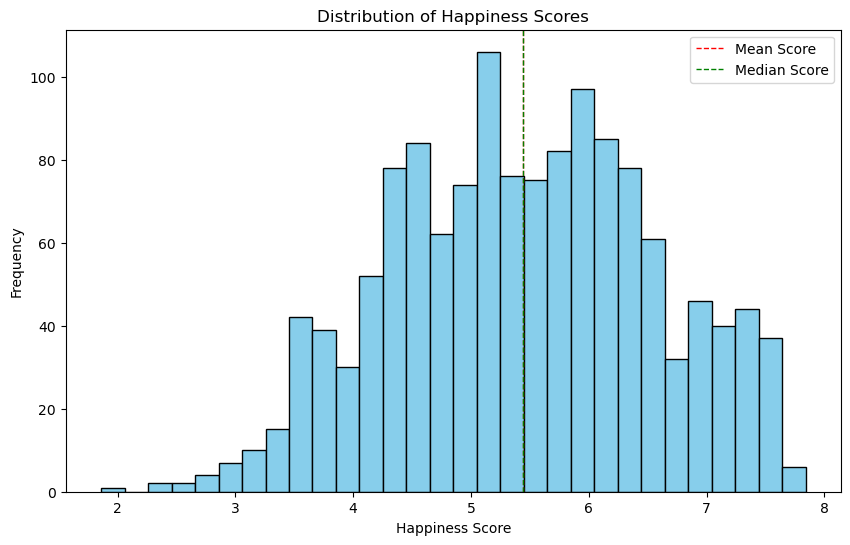

In [7]:
# Plotting the distribution of Happiness Scores
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.axvline(data_cleaned['Score'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Score')
plt.axvline(data_cleaned['Score'].median(), color='green', linestyle='dashed', linewidth=1, label='Median Score')
plt.legend()

plt.show()

The distribution of happiness scores reveals the following key statistics:

- **Count**: There are 1,367 records in the dataset.
- **Mean**: The average happiness score is approximately 5.44.
- **Standard Deviation**: The scores vary with a standard deviation of about 1.12.
- **Min/Max**: Scores range from a low of 1.859 to a high of 7.842.
- **Quartiles**: 25% of scores are below 4.5995 (1st quartile), the median (50th percentile) is 5.44, and 75% of scores are below 6.2565 (3rd quartile).

In the histogram, the mean and median happiness scores are indicated by the red and green dashed lines, respectively. The distribution appears roughly normal with a slight skew towards higher scores.

### Determining a Cutoff Point for Happiness
Given the mean and median are very close, using either as a cutoff point for determining happiness could be reasonable. However, considering the goal is to create a binary indicator of happiness (1 for happy, 0 for not happy), and aiming for a balanced classification, the median could serve as a slightly better cutoff point because it ensures an equal split of the dataset. This approach classifies individuals with happiness scores above the median as happy (1) and those below as not happy (0).

In [8]:
# Adding a binary happiness indicator based on the median score
data_cleaned['HappinessIndicator'] = (data_cleaned['Score'] > data_cleaned['Score'].median()).astype(int)

# Quick check to see the new column
data_cleaned.head()

,Score,GDPperCapita,Family,LifeExpectancy,Freedom,NoCorruption,Generosity,DystopiaResidual,HappinessIndicator
0,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517,1
1,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702,1
2,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492,1
3,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465,1
4,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452,1


In [9]:
data_cleaned['HappinessIndicator'].value_counts()

HappinessIndicator
0    684
1    683
Name: count, dtype: int64

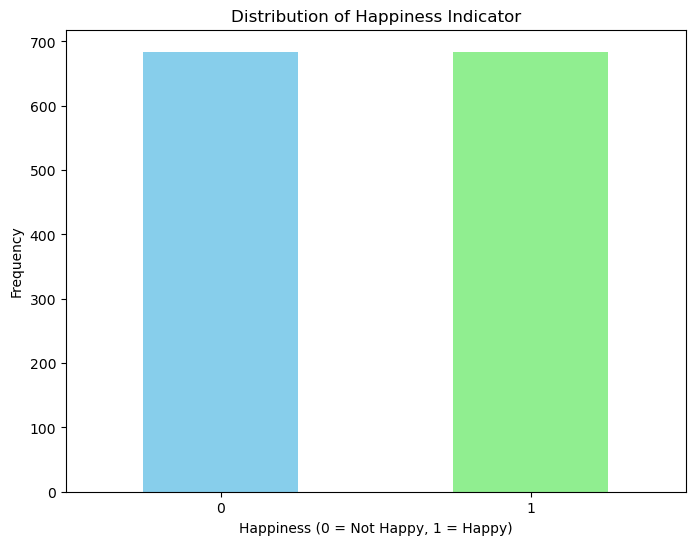

In [10]:
# Visualise the count of 'happy' vs 'not happy' as defined by our binary indicator
plt.figure(figsize=(8, 6))
data_cleaned['HappinessIndicator'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Happiness Indicator')
plt.xlabel('Happiness (0 = Not Happy, 1 = Happy)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  

plt.show()

The bar chart visualizes the distribution of our newly created HappinessIndicator binary variable, where 0 represents individuals classified as "Not Happy" and 1 represents those classified as "Happy," based on the median happiness score as the cutoff point. The visualization demonstrates a balanced distribution between the two categories, aligning with our goal of creating a balanced binary classification.

## Visualising Happy vs Not Happy 

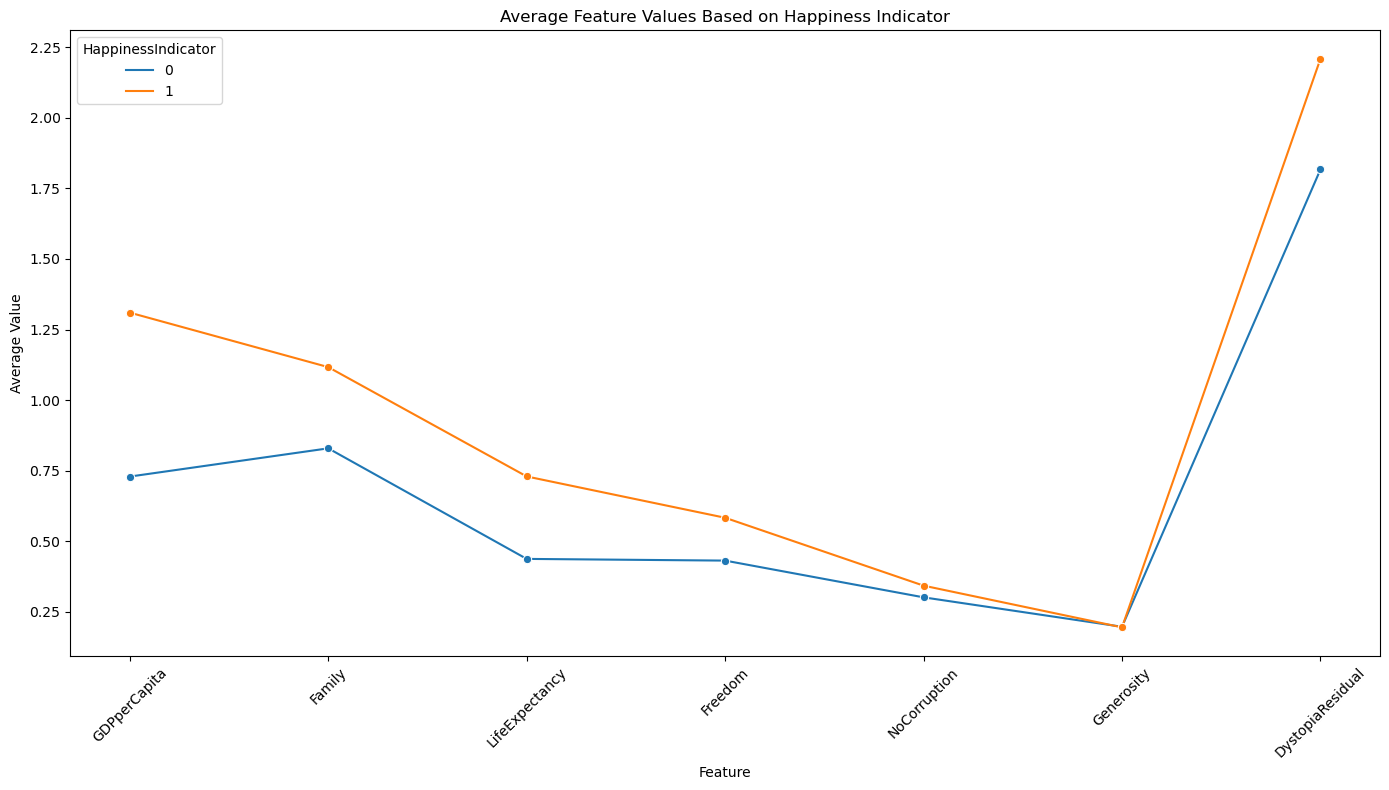

In [11]:
# Calculate the means of the features grouped by HappinessIndicator
mean_features = data_cleaned.groupby('HappinessIndicator').mean()

# Remove the 'Score' column for plotting purposes
mean_features = mean_features.drop('Score', axis=1)

# Reset index to get HappinessIndicator as a column for plotting
mean_features.reset_index(inplace=True)

# Melt the DataFrame to have feature names along the x-axis and values along the y-axis
mean_features_melted = mean_features.melt(id_vars='HappinessIndicator', var_name='Feature', value_name='Average')

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=mean_features_melted, x='Feature', y='Average', hue='HappinessIndicator', marker='o')

# Adding titles and labels
plt.title('Average Feature Values Based on Happiness Indicator')
plt.ylabel('Average Value')
plt.xlabel('Feature')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show plot
plt.show()

## Correlation Analysis with Heatmap

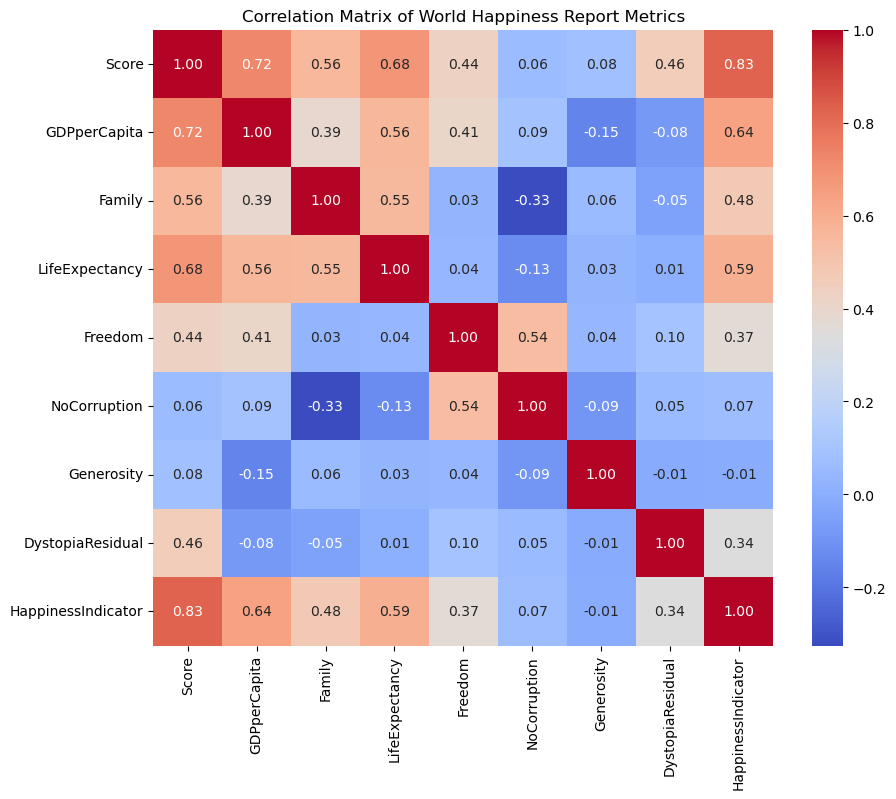

In [12]:
# Calculate the correlation matrix
corr = data_cleaned.corr() 

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of World Happiness Report Metrics')
plt.show()

## Heatmap Interpretation

### Happiness Score (Score):
Strong positive correlation with GDPperCapita (0.72) and LifeExpectancy (0.68), suggesting that higher economic output per person and longer healthy life expectancy are strongly associated with higher happiness scores.
Moderate positive correlation with Family (0.56) and Freedom (0.44), indicating that social support and freedom to make life choices are important contributors to happiness, but perhaps to a slightly lesser extent than GDP and life expectancy.

### Economic Prosperity (GDPperCapita):
The strong correlation with the happiness score and with LifeExpectancy (0.55) highlights the role of economic prosperity in supporting a longer and happier life.
Interestingly, GDPperCapita has a moderate correlation with HappinessIndicator (0.64), reinforcing the idea that economic factors significantly influence an individual's overall happiness.

### Social Support (Family):
Social support has a moderate correlation with Score and a noticeable correlation with HappinessIndicator (0.48), suggesting it is a significant factor in perceived happiness.

### Healthy Life Expectancy (LifeExpectancy):
This measure shows a substantial positive correlation with the happiness score, emphasizing the importance of health in happiness.
It also correlates with HappinessIndicator (0.59), which may reflect the direct impact of health on people's overall happiness.

### Freedom (Freedom):
The positive correlation with HappinessIndicator (0.59) suggests that freedom to make life choices is an essential determinant of happiness.
The correlation with Score is moderate, which might indicate that while freedom is important, its impact may be mediated by other factors.

### Perceptions of Corruption (NoCorruption):
Shows a very low correlation with most variables, including Score. This may indicate that while corruption impacts happiness, it may not be as strong a predictor as other factors, or it may interact with them in complex ways not captured by simple correlation.

### Generosity (Generosity):
Exhibits little to no correlation with happiness measures, suggesting that, in the context of this dataset, generosity does not have a strong standalone impact on the perceived happiness of individuals.

### Dystopia Residual (DystopiaResidual):
Has a moderate positive correlation with Score (0.34), indicating that there are factors captured by this variable that influence happiness but are not as prominent as GDP or life expectancy.

### Happiness Indicator (HappinessIndicator):
Highly correlated with Score, as expected, because it is derived from the Score.
Shows that economic factors and life expectancy are significant predictors of whether individuals fall into the happy or not happy category.

In [13]:
#Save the cleaned dataset
data_cleaned.to_csv('../data/processed/cleaned_happiness_data.csv', index=False)